In [27]:
import numpy as np

# 데이터 준비 : 농어 길이와 무게
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

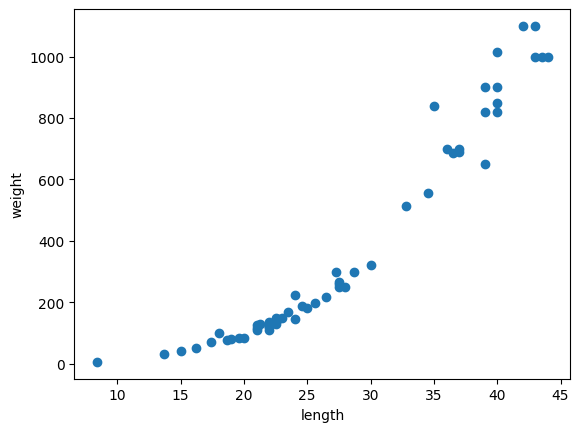

In [28]:
import matplotlib.pyplot as plt

# 데이터 산점도 확인(x축: 길이, y축: 무게)
"""
회귀 모델은 임의의 실수값을 예측하는 것이어서 y축에 타겟값을 둠
즉, 농어의 길이를 보고 '무게를 예측'하는 것이므로 무게를 y축에 둠
(물론, 회귀라고 해서 무조건 특성이 1개고 그런 건 절대 아님)
"""
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight') # 타깃값
plt.show()

In [29]:
# 학습훈련 세트 준비
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    perch_length,
    perch_weight,
    random_state = 42) # 클래스별로 고루 나누기 위한 조치가 불필요하니 stratify 매개변수 x, 재현성만 챙김
# 섞이고 분리해도 짝(length와 weight 인덱스끼리 순서쌍 맞춘 거)은 여전히 유지됨

In [30]:
"""
타깃 데이터(예측 테스트 데이터)는 1차원 배열(샘플 개수,)이어도 충분함 -> 어차피 정답(클래스나 값)인지 아닌지만 판별하면 되므로
근데 학습훈련 데이터(입력 데이터)는 무조건 2차원 배열(샘플 개수, 특성 개수)이어야 함 -> 열심히 확실하게 공부해야 되니까

아직 와닿지는 않은데, 머신러닝은 패턴을 학습하는 시스템
머신러닝의 철학은 어떤 대상(샘플)이 주어졌을 때 그게 속한 그룹이나 결과값(출력)을 보려면, 해당 대상의 여러 측면(특성)을 바라봐야 함
"""

# 하지만, 사이킷런 모듈의 테스트 트레인 스플릿 메소드는 배열의 차원을 바꾸지 않음
# 입력이 타깃이나 훈련이나 1차원 배열이었으니 여전히 분리된 결과는 1차원에서 머묾
print(train_input.shape, test_input.shape) # (42,) (14,) -> 여전히 1차원 배열

(42,) (14,)


In [31]:
# 행렬 차원 바꾸기
"""
[1, 2, 3] -> 크기는 (3,), 넘파이에서는 1차원이라 열 정보 x
[[1],
 [2],
 [3]] -> 크기는 (3, 1), 샘플 3개 특성 1개
"""
test_array = np.array([1,2,3,4])
print(test_array.shape) # -> 1차원이면 열 정보 출력 x

# reshape(행, 열) 형식으로 파라미터 처리
# test_array = test_array.reshape(2, 3) # 이러면 에러 발생 2 곱하기 3은 6...
test_array = test_array.reshape(2, 2) # 2행 2열
print(test_array)
test_array = test_array.reshape(4, 1) # 4행 1열
print(test_array)
"""
여기서는 특성이 1개인 케이스지만, 그렇다고 머신러닝이 동작하지 않는 건 x
학습훈련 데이터는 '2차원 배열'이어야 하는 거지, 특성이 2개 이상이어야 한다 이건 아님
"""
train_input = train_input.reshape(-1, 1) # 열의 -1은 전체 갯수에서 행 파라미터 나눠버린 셈
test_input = test_input.reshape(-1, 1) # -> 열 차원 정하고 행은 나머지 차원으로 채워넣기
# print(train_input)
# print(test_input)

(4,)
[[1 2]
 [3 4]]
[[1]
 [2]
 [3]
 [4]]


In [32]:
"""
k-nn 회귀모델 훈련 -> R Square(결정계수) 계측
"""
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor() # k-nn 회귀모델 생성
knr.fit(train_input, train_target) # 학습
knr.score(test_input, test_target) # 예측 -> 0.992809406101064 = 약 99.3%의 정답률
# 보통 사이킷런의 score 메소드는 값이 높을 수록 좋다고 생각하기

0.992809406101064

In [33]:
"""
mae(mean_absolute_error) 계측
"""
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input) # 테스트 샘플에 대해 각 대응되는 예측값들 배열 출력

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
# MAE는 모델 예측이 실제 값과 평균적으로 얼마나 차이나는지 알려주는 지표
mae = mean_absolute_error(test_target, test_prediction)
print(mae) # 19.157142857142862 -> 무게(타깃) 예측하는데 실제로 약 19그램의 오차가 있다

19.157142857142862


In [35]:
# 한번 스코어를 훈련 세트로 매겨보자
print(knr.score(train_input, train_target)) # 0.9698823289099254
"""
조금 이상한 상황
K-NN 분류 모델 공부할 때, 정답지로 공부해서 시험 친 꼴이 바로 위와 같은 코드였는데
여기서는 100퍼센트가 안 나온다. 오히려 테스트 세트로 스코어를 매긴 것보다 더 낮게 나왔다

이걸 머신러닝에서 '과소적합(Underfitting)'이라고 함
(반대 상황으로는 테스트 세트 스코어가 더 높고 훈련 세트 스코어가 더 낮으면 과대적합(Overfitting))

훈련 세트의 각 샘플도 자신 포함 주변 디폴트 5개의 평균을 반환
즉, 자기 자신만 정확히 예측되는 게 아니라 주변 이웃값들과 섞인 평균값을 내기 때문에 완벽한 값과는 약간 차이가 날 수 있고 잔차가 발생하게 됨
과적합이 나오는데, 과소일지 과대일지는 걍 운적인 요소(즉, 주변에 어떤 것들이 K개 있는지에 따라)일 뿐이지
내 코드나 내 상황에서 특별한 이유가 있어서 과소적합이 뜬 건 아니다
"""

# 주변 이웃의 갯수가 많아질 수록 과소적합 가능성이, 적어질 수록 과대적합 가능성이 증가함
knr.n_neighbors = 3 # 5 -> 3
knr.fit(train_input, train_target) # 모델 재훈련
print(knr.score(train_input, train_target)) # 0.9804899950518966
print(knr.score(test_input, test_target)) # 0.9746459963987609
"""
이상적인 결과는 둘 다 높으면서 너무 멀지 않게, 그리고 테스트 세트 점수가 훈련 세트 점수보다 조금 더 낮게
"""

0.9698823289099254
0.9804899950518966
0.9746459963987609


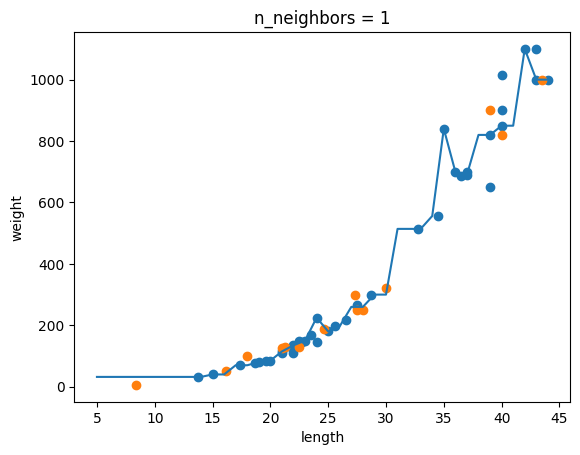

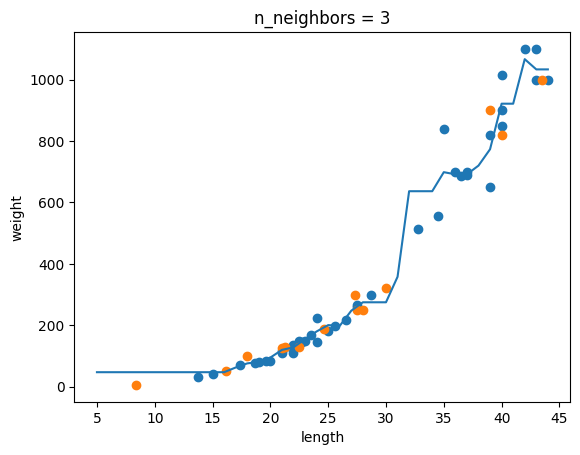

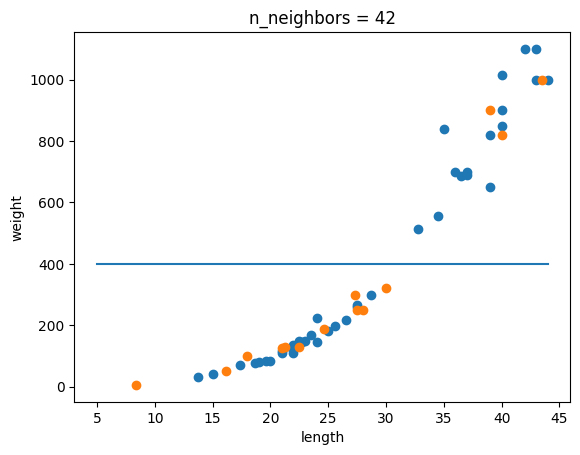

In [40]:
# 과대적합 과소적합 조금 더 알아보기
knr = KNeighborsRegressor() # k-최근접 이웃 회귀 객체 생성
x = np.arange(5, 45).reshape(-1, 1) # 5에서 45까지 x 좌표 생성 후, 학습훈련 데이터로 생성

# k가 1, 5, 10일 때
"""
k = 1 : 가장 가까운 데이터 하나만 참고, 훈련 데이터 거의 완벽히 따라감 -> 예측 곡선이 들쭉날쭉(과대적합)
k = 3 : 3개의 이웃 평균 참고, 어느 정도 매끄럽게 예측, 국소적 패턴 반영
k = 42 : 42개.. 거의 모든 샘플의 평균 참고, 국소적 패턴 무시, 전체 데이터 평균으로 수렴 → 예측이 거의 일직선(과소적합)
"""
for n in [1, 3, 42]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)

    prediction = knr.predict(x) # 지정한 범위 x에 대한 예측 구하기

    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.scatter(test_input, test_target)
    plt.plot(x, prediction) # x값에 대하여 실제 예측한 값 선으로 죽 그어 나타내보기
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

    # 이제까지의 과적합 얘기들은 K-NN 회귀 모델에서만 적용되는 얘기들이었음. 알고리즘마다 과적합 조절 방법은 조금씩 다름